# La méthode de regression par discontinuité
Ceci est un exemple tiré de [Causal Inference for the Brave and True](
https://matheusfacure.github.io/python-causality-handbook/16-Regression-Discontinuity-Design.html).
L'article sous-jacent est : [*The Effect of Alcohol Consumption on Mortality: Regression Discontinuity Evidence from the Minimum Drinking Age*](https://www.aeaweb.org/articles?id=10.1257/app.1.1.164).


In [2]:
# Installe le package "stargazer" pour la génération de tables de régression en Python
!pip install stargazer

In [3]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

In [13]:
# Importer les données
df = pd.read_csv('05b_deaths.csv')
# Générer une variable muette de seuil prenant la valeur 1 au-dessus de 21 ans
df['threshold'] = (df["agecell"] > 21)
# Nous pourrions également avoir besoin plus tard d'une variable au carré et d'une interaction
df['age_2'] = (df["agecell"]*df["agecell"])
df['age_d'] = (df["agecell"]*df["threshold"])

#Pour voir un aperçu et les statistiques de TOUTES les variables
df.head()
df.describe()

#Pour avoir un aperçu des variables que l'on vient de créer
df[['agecell','threshold','age_2','age_d']].head()
#Pour pouvoir voir les statistiques des les variables que l'on vient de créer seulement
df[['agecell','threshold','age_2','age_d']].describe()


,agecell,age_2,age_d
count,50.000000,50.000000,50.000000
mean,21.000000,442.244623,10.553425
std,1.126957,47.346785,11.103014
min,19.068493,363.607425,0.000000
25%,20.075342,403.020623,0.000000
50%,20.999995,440.999790,0.000000
75%,21.924658,480.691895,21.924658
max,22.931507,525.854013,22.931507


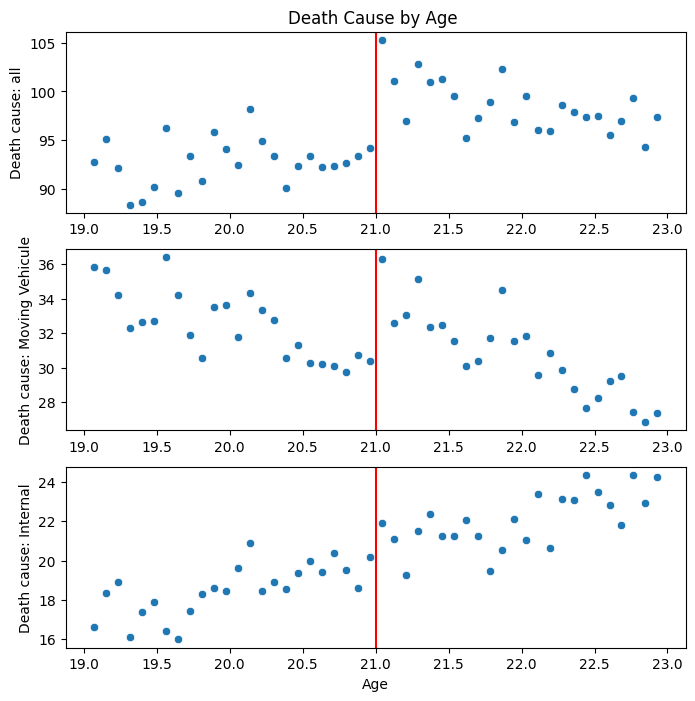

In [14]:
# D'abord, traçons le taux de mortalité (décès/100k)
# Pour tous les types de décès
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
sns.scatterplot(x='agecell', y='all', data=df)
plt.title("Death Cause by Age ")
plt.axvline(21, color="red")
plt.ylabel('Death cause: all')
plt.xlabel('')

# Pour les accidents de véhicules en mouvement
ax = plt.subplot(3,1,2, sharex=ax)
sns.scatterplot(x='agecell', y='mva', data=df)
plt.axvline(21, color="red")
plt.ylabel('Death cause: Moving Vehicule')
plt.xlabel('')

# Pour les causes internes
ax = plt.subplot(3,1,3, sharex=ax)
sns.scatterplot(x='agecell', y='internal', data=df)
plt.axvline(21, color="red")
plt.ylabel('Death cause: Internal')
plt.xlabel('Age')

plt.show()

## Régression sur internal

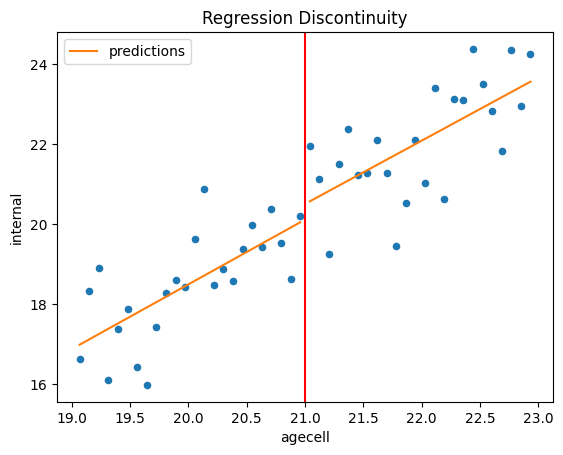

In [15]:
# Ce modèle permet d'avoir une discontinuité mais également un changement de pente (interaction)
model = smf.wls("internal~agecell+threshold+agecell*threshold", df).fit()

ax = df.plot.scatter(x="agecell", y="internal", color="C0")
df.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity")
plt.axvline(21, 0,105, color="red")
plt.show()

In [16]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-13.8756,7.495,-1.851,0.071,-28.981,1.230
threshold[T.True],1.1548,11.134,0.104,0.918,-21.284,23.593
agecell,1.6182,0.374,4.323,0.000,0.864,2.373
agecell:threshold[T.True],-0.0363,0.529,-0.069,0.946,-1.103,1.031


## Régression sur mva

<Figure size 800x800 with 0 Axes>

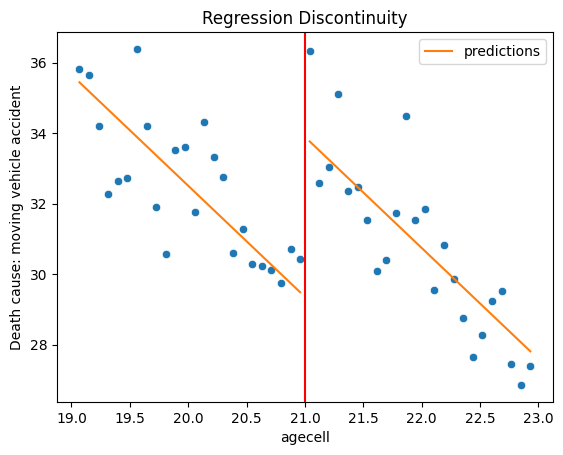

In [17]:
# Forme fonctionnelle
plt.figure(figsize=(8,8))
#ax = plt.subplot(3,1,1)
ax = df.plot.scatter(x='agecell', y='mva', color="C0")
sns.scatterplot(x='agecell', y='mva', data=df)
plt.title("Death Cause by Age ")
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: moving vehicle accident')
plt.xlabel('')

model1 = smf.wls("mva~agecell+threshold", df).fit()
df.assign(predictions=model1.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

<Figure size 800x800 with 0 Axes>

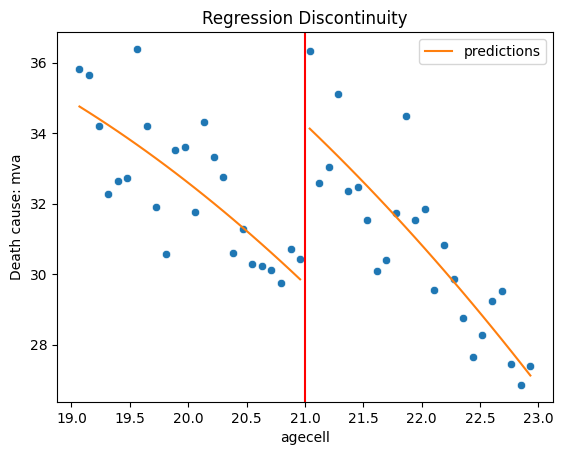

In [18]:
# Forme fonctionnelle
plt.figure(figsize=(8,8))
#ax = plt.subplot(3,1,1)
ax = df.plot.scatter(x='agecell', y='mva', color="C0")
sns.scatterplot(x='agecell', y='mva', data=df)
plt.title("Death Cause by Age ")
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: mva')
plt.xlabel('')

#Même chose qu'avant mais on rajoute l'âge au carré
model2 = smf.wls("mva~agecell+age_2+threshold", df).fit()

df.assign(predictions=model2.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

<Figure size 800x800 with 0 Axes>

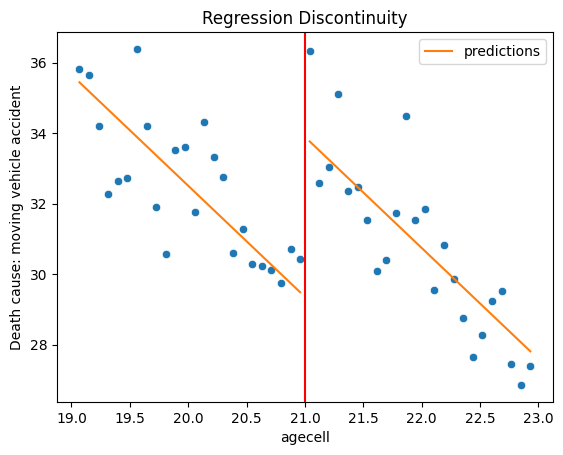

In [19]:
# Forme fonctionnelle
plt.figure(figsize=(8,8))
#ax = plt.subplot(3,1,1)
ax = df.plot.scatter(x='agecell', y='mva', color="C0")
sns.scatterplot(x='agecell', y='mva', data=df)
plt.title("Death Cause by Age ")
plt.axvline(21, 0,105, color="red")
plt.ylabel('Death cause: moving vehicle accident')
plt.xlabel('')

model3 = smf.wls("mva~agecell+threshold+agecell*threshold", df).fit()
df.assign(predictions=model1.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    mva   R-squared:                       0.703
Model:                            WLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     53.14
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           1.42e-12
Time:                        14:56:06   Log-Likelihood:                -80.225
No. Observations:                  48   AIC:                             166.4
Df Residuals:                      45   BIC:                             172.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            95.4814      6.755     14.135      0.000      81.876     109.087
threshold[T.True]     4.5340      0.768      5.904      0.000       2.987       6.081
agecell              -3.1488      0.337     -9.337      0.000      -3.828      -2.470
==============================================================================
Omnibus:                        1.492   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.227
Skew:                           0.388   Prob(JB):                        0.542
Kurtosis:                       2.888   Cond. No.                         746.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    mva   R-squared:                       0.722
Model:                            WLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     38.03
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           2.78e-12
Time:                        14:56:08   Log-Likelihood:                -78.629
No. Observations:                  48   AIC:                             165.3
Df Residuals:                      44   BIC:                             172.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -28.3775     71.524     -0.397      0.693    -172.524     115.769
threshold[T.True]     4.5340      0.751      6.035      0.000       3.020       6.048
agecell               8.6820      6.811      1.275      0.209      -5.044      22.408
age_2                -0.2817      0.162     -1.739      0.089      -0.608       0.045
==============================================================================
Omnibus:                        1.421   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.308
Skew:                           0.386   Prob(JB):                        0.520
Kurtosis:                       2.757   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    mva   R-squared:                       0.722
Model:                            WLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     38.13
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           2.67e-12
Time:                        14:56:10   Log-Likelihood:                -78.586
No. Observations:                  48   AIC:                             165.2
Df Residuals:                      44   BIC:                             172.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    83.8492      9.333      8.984      0.000      65.040     102.658
threshold[T.True]            28.9450     13.864      2.088      0.043       1.004      56.886
agecell                      -2.5676      0.466     -5.508      0.000      -3.507      -1.628
agecell:threshold[T.True]    -1.1624      0.659     -1.763      0.085      -2.491       0.166
==============================================================================
Omnibus:                        1.790   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.409   Jarque-Bera (JB):                1.591
Skew:                           0.435   Prob(JB):                        0.451
Kurtosis:                       2.800   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Table plus esthétique
results1 = smf.ols('mva~threshold', data=df).fit()
results2 = smf.ols('mva~agecell+threshold', data=df).fit()
results3 = smf.ols('mva~agecell+age_2+threshold', data=df).fit()
results4 = smf.ols('mva~agecell+threshold+age_d', data=df).fit()

stargazer_tab = Stargazer([results1, results2,  results3, results4])
# Dans une fenêtre interactive Python, exécutez simplement le nom de l'objet pour afficher la table
stargazer_tab
# Notez que -1.162*21+28.945=4.543

**Note:**

## Régressions avec plus petits voisinages:

In [24]:
# Bande passante ?
ols1 = smf.ols('mva~agecell+threshold', data=df).fit()
ols2 = smf.ols('mva~agecell+threshold', data=df[(df['agecell']>19.5) & (df['agecell']<22.5)]).fit()
ols3 = smf.ols('mva~agecell+threshold', data=df[(df['agecell']>20) & (df['agecell']<22)]).fit()

stargazer_tab = Stargazer([ols1, ols2, ols3])

stargazer_tab